In [1]:
suppressWarnings(
    {
        library(dplyr)
        library(ggplot2)
        library(stringr)
    }
)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
INDIR <- '/rds/general/user/snb20/home/3_COVID19/Thesis'

In [3]:
final_df <- read.csv(paste(INDIR, "COVID19_vs_healthy_pseudobulk_EDGER_filtered.csv", sep='/'), row.names=1)

In [4]:
clusters = c("EC.Aerocyte","EC.Arterial","EC.Capillary","EC.Venous.Pul","EC.Venous.Sys")

In [5]:
#clusters = c("EC.Venous.Sys","EC.Venous.Pul","EC.Capillary","EC.Arterial","EC.Aerocyte")

#GO:0050818 : regulation of coagulation

In [6]:
GOI <- c("ABAT","ADAMTS18","ADRB2","ADTRP","ALOX12","ANO6","ANXA2","ANXA2P2","ANXA5","APOE","APOH","C1QTNF1","CD36","CD9","CEACAM1","CEACAM21","CEACAM4","CEACAM5","CEACAM6","CEACAM7","CEACAM8","CPB2","DMTN","EDN1","EMILIN1","EMILIN2","ENPP4","ENPP5","EPHB2","F11","F12","F2","F2R","F2RL1","F3","F7","FAP","FGA","FGB","FGG","FOXA2","GP1BA","GP5","GP9","HPSE","HRG","HS3ST5","KLKB1","KNG1","KRT1","LPA","MIR19B1","NFE2L2","NOS3","PDGFA","PDGFB","PDGFRA","PLAT","PLAU","PLAUR","PLG","PRDX2","PRKCD","PRKG1","PROC","PROCR","PROS1","PSEN1","PSEN2","PSG1","PSG11","PSG2","PSG3","PSG4","PSG5","PSG6","PSG8","PSG9","PTGER3","S100A9","SERPINB2","SERPINC1","SERPINE1","SERPINE2","SERPINF2","SERPING1","SH2B3","SPPL2B","ST3GAL4","TBXA2R","TFPI","THBD","THBS1","TPSAB1","TPSD1","TSPAN8","UBASH3B","USF1","VKORC1","VTN","VWF")

In [7]:
df2 <- final_df[which(final_df$cell_state %in% clusters & final_df$Gene %in% GOI),]
df2$Gene <- factor(df2$Gene, levels=GOI)

In [8]:
df2$comparison_celltype <- paste(df2$comparison, df2$cell_state, sep='_')

In [9]:
levels(df2$comparison)

NULL

In [10]:
df2$comparison <- factor(df2$comparison, levels=rev(c('COVID.19','Healthy')))

In [11]:
df$cell_state<- factor(df$cell_state, levels=rev(sort(df$cell_state)))

ERROR: Error in df$cell_state: object of type 'closure' is not subsettable


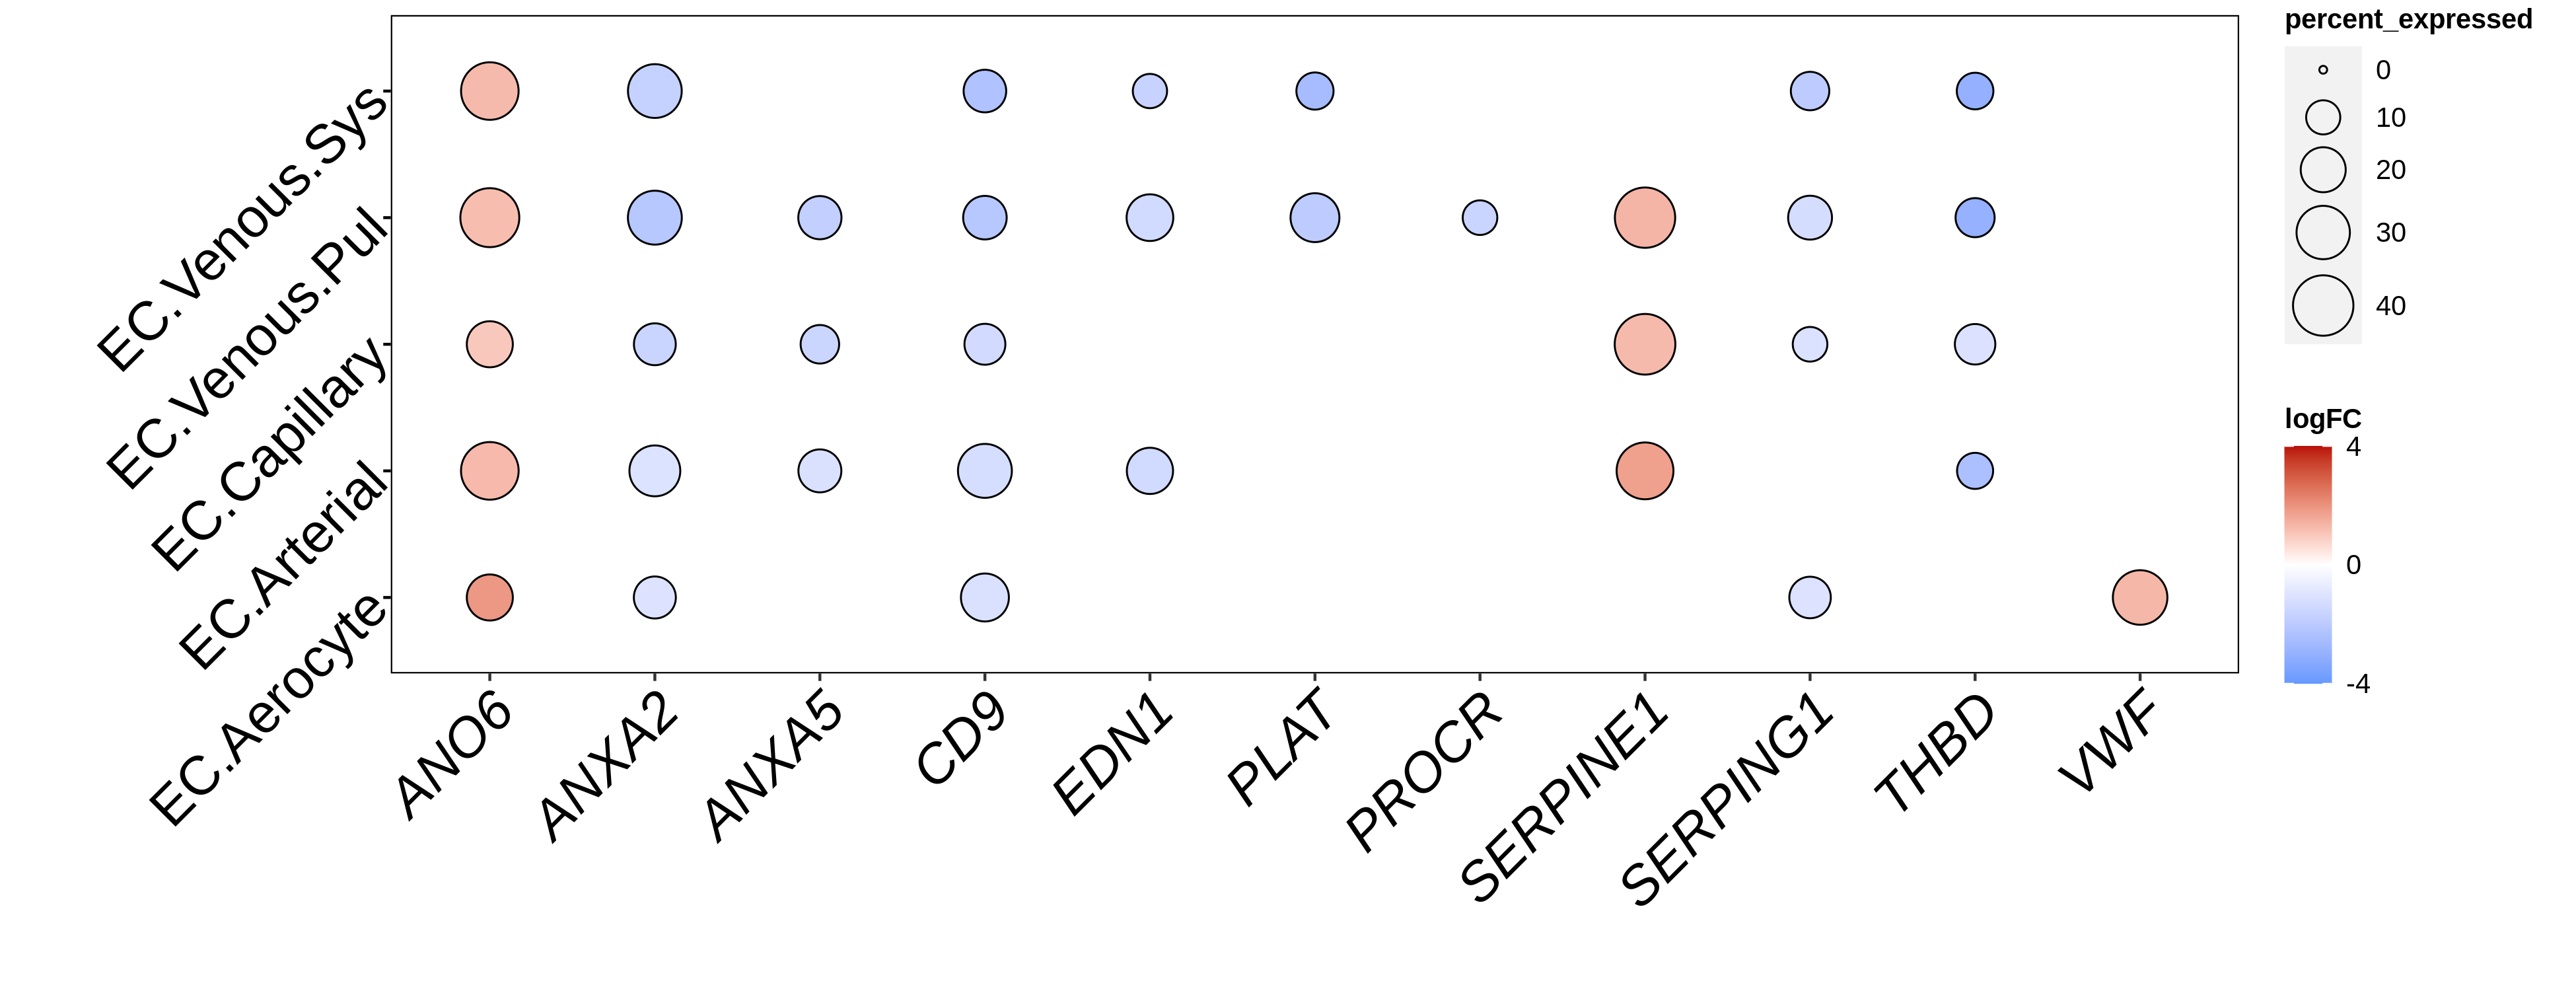

In [13]:
#pdf(width=10,height=10,file="plot.pdf") #uncomment to save as pdf. Change width and height accordingly
options(repr.plot.width = 13, repr.plot.height = 5, repr.plot.res = 300) # adjust width and height as necessary if more genes/clusters are included

#df3<-df2[df2$FDR<=0.05 & (df2$logFC<=-1 | df2$logFC>=1),]
#df3<-df2[df2$FDR<=0.05,]
df3<-df2
#df3$FDR_plot[df3$FDR > 0.05 | (df3$logFC > -1 & df3$logFC < 1)] <- NA
#df3$logFC[df3$FDR > 0.05 | (df3$logFC > -1 & df3$logFC < 1)] <- NA
df3$FDR_plot[df3$FDR > 0.05] <- 0
border_ldFC <- ceiling(max(abs(df3$logFC)))
#min_logp=min(df3$FDR_plot)
min_logp=0
max_logp=max(df3$percent_expressed)
g <- ggplot() + 
    geom_point(data=df3, aes(x=Gene, y=cell_state, fill=logFC, size=percent_expressed), colour="black",pch=21, stroke=0.5) + 
    theme(
              axis.text.x=element_text(size=20, color="black", angle=45, hjust=1, face = "italic"),
              axis.title=element_text(size=20, color="black", face = "bold"),
              axis.text.y=element_text(size=20, color="black", angle=45),
              axis.ticks.y=element_line(color="black"),
              plot.title = element_text(size = 25, face = "bold"),
              legend.title=element_text(size=10, face = "bold"), 
              legend.text=element_text(size=10),
              panel.background = element_rect(fill = NA, color="black"),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank()
             ) + scale_fill_gradient2(low="#6699FF", mid = "white", high="#b90e0a", 
                                      breaks=c(-border_ldFC,0,border_ldFC), 
                                      limits=c(-border_ldFC,border_ldFC)) + xlab("")+ ylab("") + 
scale_size(range = c(1,10), limits= c(min_logp,max_logp)) 
rm (df3)
rm (border_ldFC)
rm (min_logp)
rm (max_logp)
#ggsave(plot=g,height=6,width=12,dpi=300, filename="./dotplot_all_comparisons_other_genes.pdf", useDingbats=FALSE)
g
#dev.off() #uncomment when saving pdf